# Airline Data Analysis

In this analysis, I will analyze a mock airline dataset from Kaggle (link: https://www.kaggle.com/datasets/iamsouravbanerjee/airline-dataset). 

Using pandas and matplotlib, I will clean the data, answer preliminary exploratory questions, and plot simple visualizations to help us understand the data.

## Installing Packages and Reading In Data

First, import pandas and matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Then, read the data into a pandas dataframe and take a quick look.

In [2]:
data = pd.read_csv('Airline Dataset.csv')

In [3]:
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


## Research Questions

### Passenger Analysis
- How many unique passengers are there in the dataset? 
- What is the gender distribution of passengers? 
- What is the average age of passengers? 
- What is the most popular nationality in the dataset? 
- What is the age distribution of passengers by gender? 

### Relationships and Correlations
- Is there a relationship between date and flight status? 
- Which nationalities tend to have the oldest passengers? 

## Data Cleaning and Preparation

### Renaming columns (helps with formatting / uniformity)

In [33]:
data = data.rename(columns={'Passenger ID':'passenger_id', 'First Name':'fname', 'Last Name' : 'lname', 'Gender':'gender', 
                    'Age':'age', 'Nationality':'nationality', 'Airport Name':'airport_name', 
                     'Airport Country Code':'airport_countrycode', 'Country Name': 'airport_countryname',
                    'Airport Continent':'airport_continentcode', 'Continents':'airport_continent', 
                     'Departure Date':'departure_date', 'Arrival Airport':'arrival_airport', 'Pilot Name':'pilot',
                    'Flight Status':'flight_status'})

### Changing departure_date to data type datetime; creating new columns for month and day of week for departure date. 

In [50]:
data['departure_date'] = pd.to_datetime(data['departure_date'])
data['month'] = data['departure_date'].dt.month
data['day_of_week'] = data['departure_date'].dt.dayofweek

### Create a list of names of days of the week, then map the values in 'day of week' to this list.

This step replaces the numerical values for day of the week with the appropriate string values.

In [51]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_of_week'] = data['day_of_week'].map(lambda x: day_names[x])

## Question 1: How many unique passengers are there in the dataset?

In [38]:
#Count the number of unique passengers using the nunique() method. 
passengers_unique = data['passenger_id'].nunique()

In [35]:
print ('There are',passengers_unique,'unique passengers in this dataset.')

There are 59871 unique passengers in this dataset.


## Question 2: What is the gender distribution of passengers? 

In [37]:
#Create a new dataframe dropping all duplicate values for passenger_id. 
#This action leaves us with a dataset containing all the unique passengers in the original dataset. 
passengers_unique_df = data.drop_duplicates(subset = 'passenger_id')

In [11]:
#Use value_counts to count the number of male and female passengers. 
passenger_gender_counts = passengers_unique_df['gender'].value_counts()

In [12]:
#Calculate the percentage of male passengers using a mathematical operation. Round to 2 decimal places. 
male_percent = round((passenger_gender_counts['Male'] / (passenger_gender_counts['Male'] + passenger_gender_counts['Female']))*100,2)

In [39]:
#Calculate the percentage of female passengers by subtracting male_percent from 100. 
female_percent = 100 - male_percent

In [14]:
print('The gender distribution of passengers is', male_percent.astype(str)+'%', 'male and', 
      female_percent.astype(str)+'%', 'female.')

The gender distribution of passengers is 50.25% male and 49.75% female.


## Question 3: What is the average age of passengers? 

In [41]:
#Take the mean age of passengers in the unique passengers dataframe. 
avg_age=round(passengers_unique_df.age.mean(),1)

In [42]:
print('The average age of all passengers is', avg_age.astype(str)+'.')

The average age of all passengers is 45.6.


## Question 4: What is the most popular nationality in the dataset? 

In [43]:
#Use value_counts and index for the first (most popular) value in the dataset. 
passengers_unique_df['nationality'].value_counts()[0:1]

China    11026
Name: nationality, dtype: int64

## Question 5: What is the age distribution by gender?  

In [20]:
#Filter the original dataset for males. 
males = data[data['gender'] == 'Male']

In [21]:
#Drop duplicates, leaving unique passengers. 
males = males.drop_duplicates(subset = 'passenger_id')

<Axes: >

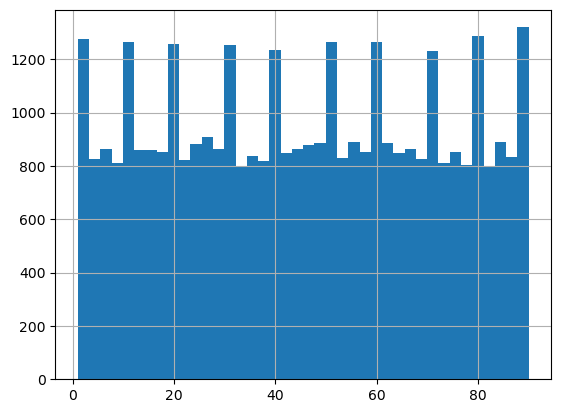

In [44]:
#Create a histogram. I chose a large bin number for visual clarity. 
males['age'].hist(bins = 40 )

<Axes: >

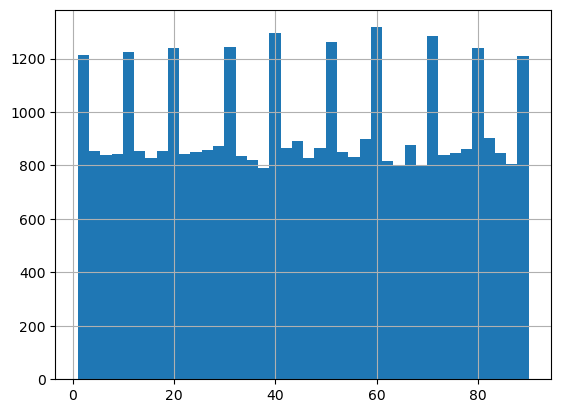

In [45]:
#Perform the exact same operations, for females. 
females = data[data['gender'] == 'Female']
females = females.drop_duplicates(subset = 'passenger_id')
females['age'].hist(bins = 40 )

Since this dataset contains mock data, it appears males and females have similar age distributions, with high numbers of passengers at ages 10, 20, 30, 40, 50, 60, 70, 80, 90, and 100. 

## Relationships and Correlations

### Departure Date and Flight Status

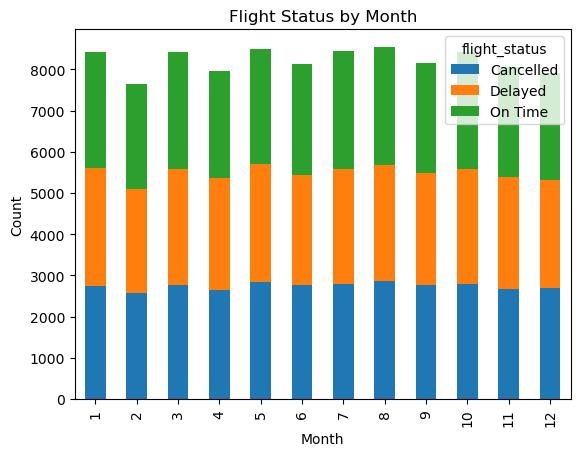

In [52]:
#Group the data by month and flight status. Then, create a stacked bar chart of the relationship. 
data.groupby(['month', 'flight_status']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Flight Status by Month')
plt.show()

It appears that once again, the data is relatively uniform across each month. However, a few insights jump out from this chart: 

- February, April, June, September, November, and December see slightly less overall flight volume than other months. 

- January, May, and September appear to have slightly more delayed flights than other months. 

Let's perform the same operation, this time analyzing flight status by the day of the week. 

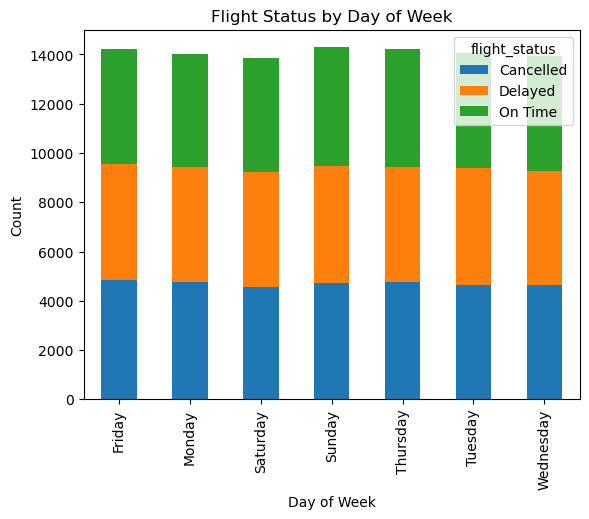

In [28]:
data.groupby(['day_of_week', 'flight_status']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Flight Status by Day of Week')
plt.show()

Again, the data looks relatively uniform. A few insights: 

- Friday, Sunday, and Thursday have the highest number of flights. 
- Saturday appears to have a relatively high number of delayed flights despite being one of the least common days for flights. 

To analyze which days see the relative highest amounts of cancellations, let's create some code that analyzes each day of the week's cancellation ratio. 

In [53]:
#Group the dataset by day of week.
total_flights = data.groupby('day_of_week').size().reset_index(name='total_flights')

#Now, create a filtered dataset including all flights that were cancelled, again grouping by day of week. 
cancelled_flights = data[data['flight_status'] == 'Cancelled'].groupby('day_of_week').size().reset_index(name='cancelled_flights')

#Merge the two datasets together, joining them on the common column 'day_of_week.'
merged_data = total_flights.merge(cancelled_flights, on='day_of_week')

#Create a new column in the merged dataset calculating the cancelation ratio for each day of the week.
merged_data['cancelled_ratio'] = merged_data['cancelled_flights'] / merged_data['total_flights']
merged_data.sort_values(by='cancelled_ratio', ascending = False)

,day_of_week,total_flights,cancelled_flights,cancelled_ratio
0,Friday,14227,4831,0.339566
1,Monday,14032,4751,0.338583
4,Thursday,14227,4757,0.334364
6,Wednesday,13939,4653,0.333812
3,Sunday,14289,4736,0.331444
5,Tuesday,14048,4645,0.330652
2,Saturday,13857,4569,0.329725


Looking at these results, it is interesting that Friday has a higher cancellation ratio than Thursday, despite the two days having the exact same number of flights. Also, Wednesday and Saturday are the two least popular days for flying; however, Wednesday has the 4th lowest cancellation ratio, and Saturday has the lowest. 

### Age and Nationality

In [56]:
#Drop duplicates and create a new dataframe containing mean age grouped by nationality. 
no_dupes = data.drop_duplicates(subset='passenger_id')
age_nat = no_dupes[['age','nationality']]
age_nat = age_nat.groupby('nationality').mean('age').sort_values(by = 'age')

In [57]:
#Create a new dataframe containing the counts of each type of nationality. 
total_nat = no_dupes.groupby('nationality').size().reset_index(name='count')

In [58]:
#Merge the two dataframes and sort by the most popular nationalities. 
merged_nat = age_nat.merge(total_nat, on = 'nationality')
merged_nat = merged_nat.sort_values(by='count')

In [59]:
#To enhance the context of our analysis, let's filter down to only nationalities with over 100 flights. 
biggest_nationalities = merged_nat[merged_nat['count'] >= 100]

In [62]:
biggest_nationalities

,nationality,age,count
162,Lithuania,47.470000,100
47,Israel,42.616822,107
170,North Korea,47.908257,109
145,Kenya,46.657658,111
121,New Zealand,45.982143,112
...,...,...,...
113,Brazil,45.525512,2293
118,Philippines,45.851643,3195
94,Russia,45.025215,3490
112,Indonesia,45.519121,6459


Like previously, the data seems relatively standard across nationalities. However, it is worth noting that mean age tends to converge toward 45 as the sample size increases. At lower counts, several countries have mean ages lower or higher than 45. 